# ADTA 5560.701 Recurrent Neural Networks for Sequence Data

Assignment 3

# 1. Overview
# 1.1 Sequence Data and Recurrent Neural Network (RNN)

Sequence data are ubiquitous in the real world, and sine wave data is one famous example. One of the most significant underlying properties of sequence data is persistence, which is closely related to memory. Thanks to its ability to possess a hidden state that can represent memory, the recurrent neural network is a good fit for processing sequence data.



# 1.2 TensorFlow

The Google Brain team created TensorFlow, an open-source library, for numerical computation and large-scale artificial intelligence (AI) machine learning and deep learning projects. TensorFlow bundles together a broad spectrum of machine learning and deep learning models. It uses Python to provide a convenient front-end API for building applications with the framework while executing those applications in high-performance C++.

# PART I: Build, Train, and Test a Simple RNN on Sine Wave Data

In [1]:
# -------- IMPORT BASIC LIBRARIES --------
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# -------- For timeseries RNN neural network --------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# -------- IMPORT KERAS: TimeseriesGenerator --------
# This class produces time series batches used on training/testing the model
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# -------- IMPORT KERAS: MinMaxScaler --------
# This class is used to preprocess (scale) the data
from sklearn.preprocessing import MinMaxScaler


2024-11-04 20:26:53.992311: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-04 20:26:53.992351: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Generate Data 

[0.00000000e+00 6.25610948e-02 1.25122190e-01 ... 6.38748778e+01
 6.39374389e+01 6.40000000e+01]
[0.         0.06252029 0.12479597 ... 0.86393146 0.89372716 0.92002604]


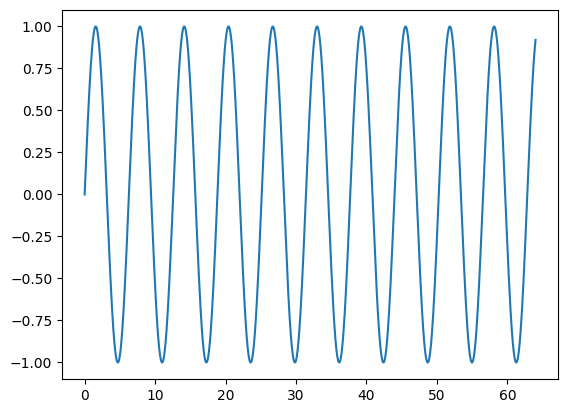

In [2]:
# Create a simple sine wave using Numpy
x = np.linspace(0, 64, 1024)
y = np.sin(x)

# Display the values of x and y
print(x)

print(y)


# Plot the sine wave
plt.plot(x, y)
plt.show()


In [3]:
# Create a DataFrame using the sine wave data
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

# Display the first 5 rows of the DataFrame
df.head(5)


,Sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641


In [4]:
# Check the length of the DataFrame

len(df)

1024

# Split Data and Train Test 

In [5]:
# Set percentage of data used for testing

test_percent = 0.2

In [6]:
# Calculate the number of data points reserved for testing

len(df) * test_percent

204.8

In [7]:
# Round the length to get the number of data points in the testing set

test_length = int(np.round(len(df) * test_percent))

In [8]:
# Display the test length

test_length

205

In [9]:
# Calculate the starting index for the testing dataset

test_start_index = int(len(df) - test_length)


In [10]:
# Display the starting index for the test data

test_start_index

819

In [11]:
# Create separate training / testing datasets

# Training dataset: All indices from start to test_start_index (excluding test_start_index)

data_train = df.iloc[:test_start_index]

# Testing dataset: All indices from test_start_index to the end of the DataFrame (including test_start_index)

data_test = df.iloc[test_start_index:]

# Display the first 10 rows of the training dataset

data_train.head(10)


,Sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641
0.312805,0.307729
0.375367,0.366614
0.437928,0.424064
0.500489,0.479854
0.563050,0.533768


In [12]:
# Display the first 10 rows of the test dataset
data_test.head(10)

,Sine
51.237537,0.826045
51.300098,0.859666
51.362659,0.889923
51.425220,0.916698
51.487781,0.939887
51.550342,0.959398
51.612903,0.975155
51.675464,0.987097
51.738025,0.995177
51.800587,0.999363


# Normalize Data ( Scale it into the range [0, 1])

In [13]:
# Create a MinMaxScaler to normalize the data
scaler = MinMaxScaler()

# Train the scaler to perform the normalization on the training data only
scaler.fit(data_train)

# Normalize the training dataset
normalized_train = scaler.transform(data_train)

# Normalize the testing dataset
normalized_test = scaler.transform(data_test)


# Create Timeseries Generator Instances 

In [14]:
# TimeseriesGenerator: Generate time series batches for training/testing

# Set the length of the input sequence
# i.e., the number of time series steps that are used to predict the future one
# Use 50 historical data points to predict the next one

length = 50

# batch_size: Number of time series samples in each batch
# One sample: each sample is a time series input sequence
# Only one sample in each batch

batch_size = 1

# Create a TimeSeriesGenerator for training: train_tsGenerator
# This time series generator produces time series batches used to train the model
# TimeseriesGenerator(inputs dataset, outputs dataset, length, batch_size)

train_tsGenerator = TimeseriesGenerator(normalized_train, normalized_train, length=length, batch_size=batch_size)

# Check the length of the generator to confirm it has been created

len(normalized_train)


819

In [15]:
# Create a TimeSeriesGenerator for test: test_tsGenerator

test_tsGenerator = TimeseriesGenerator(normalized_test, normalized_test, length=length, batch_size=batch_size)

# Check the length of the generator to confirm it has been created

len(normalized_test)

205

In [16]:
# What does the first batch look like?

X, y = train_tsGenerator[0]


In [17]:
# Print X.flatten()

X.flatten()

array([0.49999882, 0.53125908, 0.56239703, 0.59329085, 0.62381964,
       0.65386398, 0.6833063 , 0.7120314 , 0.73992691, 0.76688367,
       0.79279621, 0.81756315, 0.84108759, 0.86327747, 0.88404598,
       0.90331187, 0.92099975, 0.93704041, 0.9513711 , 0.96393574,
       0.97468518, 0.98357735, 0.99057747, 0.99565814, 0.99879949,
       0.99998922, 0.99922268, 0.99650287, 0.99184044, 0.98525361,
       0.97676818, 0.96641732, 0.95424156, 0.94028851, 0.92461278,
       0.90727571, 0.88834511, 0.86789506, 0.84600558, 0.82276231,
       0.79825619, 0.7725831 , 0.7458435 , 0.718142  , 0.68958699,
       0.66029019, 0.63036624, 0.59993221, 0.56910717, 0.53801175])

In [18]:
# Print y: What does X predict
y


array([[0.50676759]])

# Build Train and Test Model 

Build Simple RNN MOdel 

In [19]:
# Data set: Only one column/attribute: Sine values of index x
# Features: How many features used to train the model: Only one

n_features = 1


# Define the model

model = Sequential()

# Add a simple RNN layer using SimpleRNN cells
# This layer has 100 neurons: One neuron for each input data point
# NOTES: # time series steps of the input sequence: 50

model.add(SimpleRNN(100, input_shape=(length, n_features)))

# Add a fully-connected (Dense) layer for the final prediction
# Only one neuron in the Dense layer to predict the next data point

model.add(Dense(1))


2024-11-04 20:26:56.381012: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-11-04 20:26:56.381054: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-11-04 20:26:56.381079: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tf2-keras-ann-vm): /proc/driver/nvidia/version does not exist
2024-11-04 20:26:56.381338: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Compile Model

In [20]:
# Compile the model
# Loss function: mse (Mean Squared Error)
# Optimizer: Adam

model.compile(optimizer='adam', loss='mse')

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


# Train Fit Model 

In [21]:
# Fit the model
# Use fit_generator(), NOT fit()

model.fit_generator(train_tsGenerator, epochs=5)



Epoch 1/5


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


769/769 [==============================] - 9s 10ms/step - loss: 0.0045
Epoch 2/5
769/769 [==============================] - 7s 9ms/step - loss: 6.1745e-05
Epoch 3/5
769/769 [==============================] - 6s 8ms/step - loss: 1.8561e-04
Epoch 4/5
769/769 [==============================] - 7s 9ms/step - loss: 1.7630e-04
Epoch 5/5
769/769 [==============================] - 7s 9ms/step - loss: 1.4492e-04


# Visualize Model's Performances after Traning.


<AxesSubplot:>

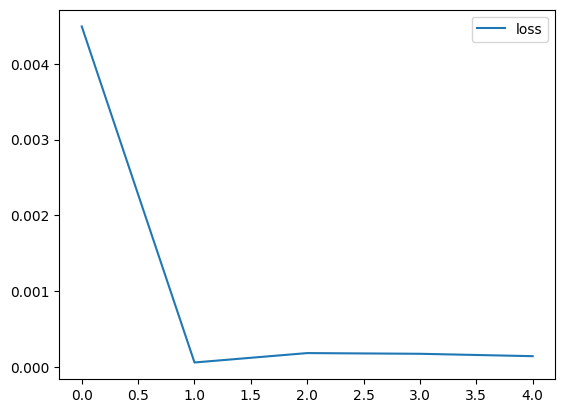

In [23]:
# Load the loss data (model.history.history) into a DataFrame
df_model_loss = pd.DataFrame(model.history.history)

# Visualize the loss data using DataFrame.plot()
df_model_loss.plot()


# Evaluate Model on Test Data 

A sneak peak into the test data 

In [26]:
# Number of time steps of the input time series
length = 50

length


50

In [27]:
# Take a sneak peek into the 1st time series batch (50 data points)
# array[-length:]: A sequence of [50th to the last .. last]

first_eval_batch = normalized_train[-length:]

# Display the first evaluation batch

first_eval_batch

array([[8.31976169e-02],
       [6.67457884e-02],
       [5.19891118e-02],
       [3.89853243e-02],
       [2.77853048e-02],
       [1.84328746e-02],
       [1.09646261e-02],
       [5.40977978e-03],
       [1.79006951e-03],
       [1.19657859e-04],
       [4.05080501e-04],
       [2.64522069e-03],
       [6.83131362e-03],
       [1.29469807e-02],
       [2.09682938e-02],
       [3.08638684e-02],
       [4.25949871e-02],
       [5.61157506e-02],
       [7.13732572e-02],
       [8.83078103e-02],
       [1.06853151e-01],
       [1.26936720e-01],
       [1.48479936e-01],
       [1.71398511e-01],
       [1.95602771e-01],
       [2.20998016e-01],
       [2.47484883e-01],
       [2.74959740e-01],
       [3.03315088e-01],
       [3.32439984e-01],
       [3.62220472e-01],
       [3.92540034e-01],
       [4.23280041e-01],
       [4.54320219e-01],
       [4.85539119e-01],
       [5.16814595e-01],
       [5.48024277e-01],
       [5.79046054e-01],
       [6.09758550e-01],
       [6.40041598e-01],


# Important NOte:
first_evel_batch: currently is a 2D array 50 x 1 ( 50 rows, 1 column)

It is necceassary to reshape it into a 3D array: 1 x 50 x 1 ( 1 plane, 50 row, 1 column) 

In [29]:
# Reshape the first evaluation batch
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

# Display the reshaped evaluation batch
first_eval_batch


array([[[8.31976169e-02],
        [6.67457884e-02],
        [5.19891118e-02],
        [3.89853243e-02],
        [2.77853048e-02],
        [1.84328746e-02],
        [1.09646261e-02],
        [5.40977978e-03],
        [1.79006951e-03],
        [1.19657859e-04],
        [4.05080501e-04],
        [2.64522069e-03],
        [6.83131362e-03],
        [1.29469807e-02],
        [2.09682938e-02],
        [3.08638684e-02],
        [4.25949871e-02],
        [5.61157506e-02],
        [7.13732572e-02],
        [8.83078103e-02],
        [1.06853151e-01],
        [1.26936720e-01],
        [1.48479936e-01],
        [1.71398511e-01],
        [1.95602771e-01],
        [2.20998016e-01],
        [2.47484883e-01],
        [2.74959740e-01],
        [3.03315088e-01],
        [3.32439984e-01],
        [3.62220472e-01],
        [3.92540034e-01],
        [4.23280041e-01],
        [4.54320219e-01],
        [4.85539119e-01],
        [5.16814595e-01],
        [5.48024277e-01],
        [5.79046054e-01],
        [6.0

In [30]:
first_eval_batch.shape

(1, 50, 1)

# Evaluate Model

In [31]:
# ALL the code for evaluation

# Declare a list to store all the predictions
test_predictions = []

# Get the first time series batch for testing
# The 1st batch: The 1st time series input sequence (last 50 data points of the training dataset)
first_eval_batch = normalized_train[-length:]

# Reshape the batch into 3D array: #samples/batch x Length x #features
current_batch = first_eval_batch.reshape((1, length, n_features))

# Run a FOR loop to make a prediction for each batch
for i in range(len(data_test)):
    # Get the value of the first element: The prediction
    current_pred = model.predict(current_batch)[0]
    
    # Store prediction into the list of predictions
    test_predictions.append(current_pred)
    
    # Generate a new batch to prepare for the next iteration of testing
    # Drop the first data point and add the current prediction at the end
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)


In [32]:
# Convert the scaled result back to the real values
true_predictions = scaler.inverse_transform(test_predictions)

# Display the true predictions
true_predictions


array([[ 0.82644762],
       [ 0.85986639],
       [ 0.88978113],
       [ 0.91624908],
       [ 0.93908973],
       [ 0.95818556],
       [ 0.97357244],
       [ 0.985186  ],
       [ 0.9930303 ],
       [ 0.99726341],
       [ 0.99782989],
       [ 0.99481343],
       [ 0.98834039],
       [ 0.9785481 ],
       [ 0.96561012],
       [ 0.94950751],
       [ 0.93046068],
       [ 0.90856666],
       [ 0.884015  ],
       [ 0.85686304],
       [ 0.82726957],
       [ 0.79538013],
       [ 0.76123919],
       [ 0.72502056],
       [ 0.68682879],
       [ 0.64672944],
       [ 0.60482753],
       [ 0.56123798],
       [ 0.51605008],
       [ 0.46934107],
       [ 0.42121133],
       [ 0.37171641],
       [ 0.32099067],
       [ 0.26911908],
       [ 0.21617724],
       [ 0.16230307],
       [ 0.10757584],
       [ 0.05213276],
       [-0.00387871],
       [-0.06034699],
       [-0.11712801],
       [-0.17403486],
       [-0.23089027],
       [-0.28752955],
       [-0.34371995],
       [-0

In [33]:
data_test

,Sine
51.237537,0.826045
51.300098,0.859666
51.362659,0.889923
51.425220,0.916698
51.487781,0.939887
...,...
63.749756,0.794329
63.812317,0.830756
63.874878,0.863931
63.937439,0.893727


In [34]:
# Copy the true values of predictions into the data frame of original test data
# Add it as another column
data_test['Predictions'] = true_predictions


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
# Update data_test
data_test

,Sine,Predictions
51.237537,0.826045,0.826448
51.300098,0.859666,0.859866
51.362659,0.889923,0.889781
51.425220,0.916698,0.916249
51.487781,0.939887,0.939090
...,...,...
63.749756,0.794329,0.876093
63.812317,0.830756,0.920829
63.874878,0.863931,0.960656
63.937439,0.893727,0.995531


<AxesSubplot:>

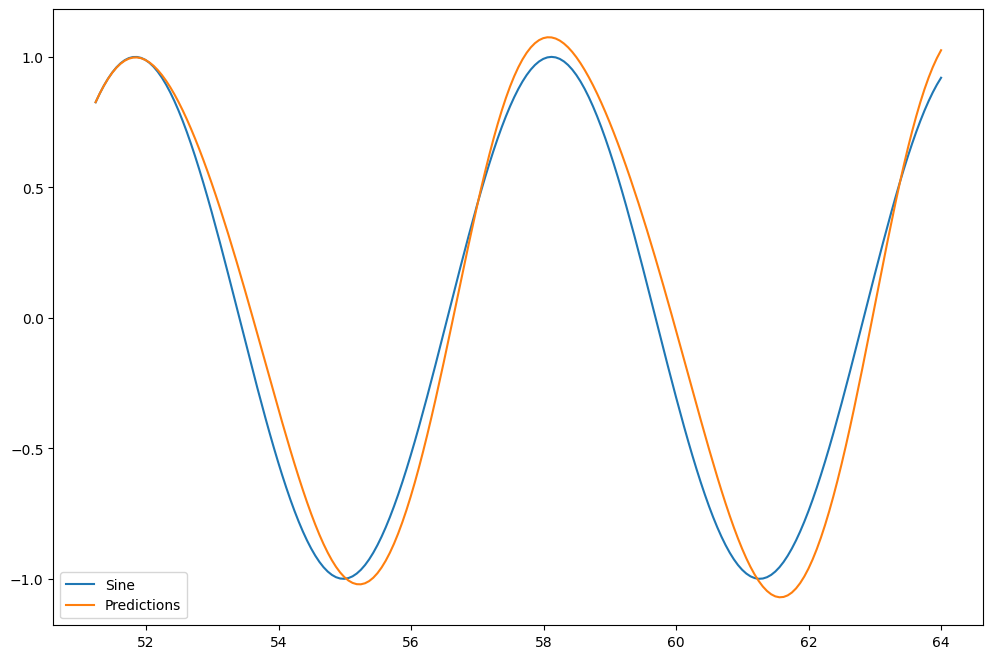

In [36]:
# Visualize the data of the updated test data
# Compare the predicted sine wave against the original sine wave

data_test.plot(figsize=(12, 8))


# Refereance 
https://www.youtube.com/watch?v=CcN7ucFEYIc

https://www.youtube.com/watch?v=wFuByXsBCfQ

https://www.youtube.com/watch?v=mD3GnwjYM_s

https://www.youtube.com/watch?v=jP85vmnvQrA

https://www.youtube.com/watch?v=hDrl5osf_ew


In [37]:
# Thank you so much 